**1. DATA CLEANING AND PREPROCESSING**

In [1]:
import pandas as pd
import numpy as np

In [2]:
#Load the dataset
df = pd.read_csv("/content/airbnb-listings.csv")
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2.818000e+03,Condo in Amsterdam · ★4.89 · 1 bedroom · 2 bed...,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.364350,4.943580,Private room,69,3,336,5/31/2023,1.95,1,7,40,NaN
1,2.016800e+04,Townhouse in Amsterdam · ★4.44 · 1 bedroom · 1...,59484,Alexander,NaN,Centrum-Oost,52.364070,4.893930,Private room,106,1,339,4/9/2020,2.10,2,0,0,NaN
2,2.133710e+05,Rental unit in Amsterdam · ★4.86 · 3 bedrooms ...,1100324,Hendrik,NaN,De Pijp - Rivierenbuurt,52.351500,4.896560,Entire home/apt,270,4,23,1/8/2023,0.16,1,2,1,0363 F88F 4B47 6E9B 225B
3,1.555480e+05,Rental unit in Amsterdam · ★4.76 · 1 bedroom ·...,748161,Maria,NaN,Oud-Oost,52.364200,4.928290,Entire home/apt,200,3,21,8/20/2019,0.15,1,0,0,0363 A562 4D7E 4A91 60DF
4,2.788600e+04,Houseboat in Amsterdam · ★4.94 · 1 bedroom · 1...,97647,Flip,NaN,Centrum-West,52.387610,4.891880,Private room,137,3,251,5/1/2023,1.81,1,0,20,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7603,9.060000e+17,Rental unit in Amsterdam · ★New · 2 bedrooms ·...,16570501,Willemijn,NaN,De Baarsjes - Oud-West,52.362909,4.866164,Entire home/apt,500,2,0,NaN,NaN,1,17,0,0363 3B54 57D4 8994 D1D2
7604,9.060000e+17,Rental unit in Amsterdam · ★New · 2 bedrooms ·...,132654754,Atal,NaN,Osdorp,52.354460,4.791710,Entire home/apt,190,2,0,NaN,NaN,1,34,0,0363 8CA7 6BF7 EABB 76E1
7605,9.060000e+17,Rental unit in Amsterdam · ★New · 2 bedrooms ·...,23932215,Sabine,NaN,De Baarsjes - Oud-West,52.363597,4.858541,Entire home/apt,359,2,0,NaN,NaN,1,18,0,0363 DE11 2D1E E27B 04D1
7606,9.060000e+17,Home in Amsterdam · ★New · 2 bedrooms · 2 beds...,4437313,Melianthe,NaN,Zuid,52.349906,4.860463,Entire home/apt,223,1,0,NaN,NaN,1,73,0,0363 5A64 9849 958A 8FBE


In [3]:
print(df.shape)

(7608, 18)


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7608 entries, 0 to 7607
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7608 non-null   float64
 1   name                            7608 non-null   object 
 2   host_id                         7608 non-null   int64  
 3   host_name                       7608 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   7608 non-null   object 
 6   latitude                        7608 non-null   float64
 7   longitude                       7608 non-null   float64
 8   room_type                       7608 non-null   object 
 9   price                           7608 non-null   int64  
 10  minimum_nights                  7608 non-null   int64  
 11  number_of_reviews               7608 non-null   int64  
 12  last_review                     68

In [5]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2818.0,Condo in Amsterdam · ★4.89 · 1 bedroom · 2 bed...,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,69,3,336,5/31/2023,1.95,1,7,40,NaN
1,20168.0,Townhouse in Amsterdam · ★4.44 · 1 bedroom · 1...,59484,Alexander,NaN,Centrum-Oost,52.36407,4.89393,Private room,106,1,339,4/9/2020,2.10,2,0,0,NaN
2,213371.0,Rental unit in Amsterdam · ★4.86 · 3 bedrooms ...,1100324,Hendrik,NaN,De Pijp - Rivierenbuurt,52.35150,4.89656,Entire home/apt,270,4,23,1/8/2023,0.16,1,2,1,0363 F88F 4B47 6E9B 225B
3,155548.0,Rental unit in Amsterdam · ★4.76 · 1 bedroom ·...,748161,Maria,NaN,Oud-Oost,52.36420,4.92829,Entire home/apt,200,3,21,8/20/2019,0.15,1,0,0,0363 A562 4D7E 4A91 60DF
4,27886.0,Houseboat in Amsterdam · ★4.94 · 1 bedroom · 1...,97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,137,3,251,5/1/2023,1.81,1,0,20,NaN


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
#Handle missing values
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
df['last_review']

,last_review
0,2023-05-31
1,2020-04-09
2,2023-01-08
3,2019-08-20
4,2023-05-01
...,...
7603,NaT
7604,NaT
7605,NaT
7606,NaT


In [8]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df['reviews_per_month']

,reviews_per_month
0,1.95
1,2.10
2,0.16
3,0.15
4,1.81
...,...
7603,0.00
7604,0.00
7605,0.00
7606,0.00


In [9]:
df['number_of_reviews_ltm'] = df['number_of_reviews_ltm'].fillna(0)
df['number_of_reviews_ltm']

,number_of_reviews_ltm
0,40
1,0
2,1
3,0
4,20
...,...
7603,0
7604,0
7605,0
7606,0


In [10]:
df['availability_365'] = df['availability_365'].fillna(0)
df['availability_365']

,availability_365
0,7
1,0
2,2
3,0
4,0
...,...
7603,17
7604,34
7605,18
7606,73


In [11]:
df['calculated_host_listings_count'] = df['calculated_host_listings_count'].fillna(0)
df['calculated_host_listings_count']

,calculated_host_listings_count
0,1
1,2
2,1
3,1
4,1
...,...
7603,1
7604,1
7605,1
7606,1


In [12]:
# Drop rows with missing price
df = df[df['price'].notnull()]

In [13]:
#Clean text columns (remove special chars)
df['name'] = df['name'].str.encode('ascii', 'ignore').str.decode('ascii')
df['name']

,name
0,Condo in Amsterdam 4.89 1 bedroom 2 beds 1...
1,Townhouse in Amsterdam 4.44 1 bedroom 1 bed...
2,Rental unit in Amsterdam 4.86 3 bedrooms 4 ...
3,Rental unit in Amsterdam 4.76 1 bedroom 1 b...
4,Houseboat in Amsterdam 4.94 1 bedroom 1 bed...
...,...
7603,Rental unit in Amsterdam New 2 bedrooms 2 b...
7604,Rental unit in Amsterdam New 2 bedrooms 2 b...
7605,Rental unit in Amsterdam New 2 bedrooms 2 b...
7606,Home in Amsterdam New 2 bedrooms 2 beds 2 ...


In [14]:
#Feature Engineering
#a.Extract year, month, and season from last_review
df['review_year'] = df['last_review'].dt.year
df['review_year']

,review_year
0,2023.0
1,2020.0
2,2023.0
3,2019.0
4,2023.0
...,...
7603,NaN
7604,NaN
7605,NaN
7606,NaN


In [15]:
df['review_month'] = df['last_review'].dt.month
df['review_month']

,review_month
0,5.0
1,4.0
2,1.0
3,8.0
4,5.0
...,...
7603,NaN
7604,NaN
7605,NaN
7606,NaN


In [16]:
#b.Add season column
def assign_season(month):
    if pd.isnull(month): return np.nan
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

In [17]:
df['season'] = df['review_month'].apply(assign_season)
df['season']

,season
0,Spring
1,Spring
2,Winter
3,Summer
4,Spring
...,...
7603,NaN
7604,NaN
7605,NaN
7606,NaN


In [18]:
#c.Review frequency feature
df['review_frequency'] = df['reviews_per_month'] / (df['availability_365'] + 1)
df['review_frequency']

,review_frequency
0,0.243750
1,2.100000
2,0.053333
3,0.150000
4,1.810000
...,...
7603,0.000000
7604,0.000000
7605,0.000000
7606,0.000000


In [19]:
#Convert categorical columns
categorical_cols = ['room_type', 'neighbourhood_group', 'neighbourhood', 'season']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [20]:
#Final cleaned data
df.head()

,id,name,host_id,host_name,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,...,neighbourhood_Osdorp,neighbourhood_Oud-Noord,neighbourhood_Oud-Oost,neighbourhood_Slotervaart,neighbourhood_Watergraafsmeer,neighbourhood_Westerpark,neighbourhood_Zuid,season_Spring,season_Summer,season_Winter
0,2818.0,Condo in Amsterdam 4.89 1 bedroom 2 beds 1...,3159,Daniel,52.36435,4.94358,69,3,336,2023-05-31,...,False,False,False,False,False,False,False,True,False,False
1,20168.0,Townhouse in Amsterdam 4.44 1 bedroom 1 bed...,59484,Alexander,52.36407,4.89393,106,1,339,2020-04-09,...,False,False,False,False,False,False,False,True,False,False
2,213371.0,Rental unit in Amsterdam 4.86 3 bedrooms 4 ...,1100324,Hendrik,52.35150,4.89656,270,4,23,2023-01-08,...,False,False,False,False,False,False,False,False,False,True
3,155548.0,Rental unit in Amsterdam 4.76 1 bedroom 1 b...,748161,Maria,52.36420,4.92829,200,3,21,2019-08-20,...,False,False,True,False,False,False,False,False,True,False
4,27886.0,Houseboat in Amsterdam 4.94 1 bedroom 1 bed...,97647,Flip,52.38761,4.89188,137,3,251,2023-05-01,...,False,False,False,False,False,False,False,True,False,False


In [21]:
print(df.columns)

Index(['id', 'name', 'host_id', 'host_name', 'latitude', 'longitude', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'review_year',
       'review_month', 'review_frequency', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room',
       'neighbourhood_Bijlmer-Oost', 'neighbourhood_Bos en Lommer',
       'neighbourhood_Buitenveldert - Zuidas', 'neighbourhood_Centrum-Oost',
       'neighbourhood_Centrum-West', 'neighbourhood_De Aker - Nieuw Sloten',
       'neighbourhood_De Baarsjes - Oud-West',
       'neighbourhood_De Pijp - Rivierenbuurt',
       'neighbourhood_Gaasperdam - Driemond',
       'neighbourhood_Geuzenveld - Slotermeer',
       'neighbourhood_IJburg - Zeeburgereiland', 'neighbourhood_Noord-Oost',
       'neighbourhood_Noord-West',
       'neighbourhood_Oostelijk Havengebied - Indische Buurt',
       'n

In [22]:
# Drop columns not useful for modeling
df.drop(columns=[
    'id', 'name', 'host_id', 'host_name', 'latitude', 'longitude', 'last_review',
    'number_of_reviews', 'number_of_reviews_ltm', 'license',
    'review_year', 'review_month'
], inplace=True)

In [23]:
df.to_csv("cleaned_airbnb.csv", index=False)
print("Cleaned dataset saved as 'cleaned_airbnb.csv'")

Cleaned dataset saved as 'cleaned_airbnb.csv'


In [24]:
df.head()

,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,review_frequency,room_type_Hotel room,room_type_Private room,room_type_Shared room,neighbourhood_Bijlmer-Oost,...,neighbourhood_Osdorp,neighbourhood_Oud-Noord,neighbourhood_Oud-Oost,neighbourhood_Slotervaart,neighbourhood_Watergraafsmeer,neighbourhood_Westerpark,neighbourhood_Zuid,season_Spring,season_Summer,season_Winter
0,69,3,1.95,1,7,0.243750,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,106,1,2.10,2,0,2.100000,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,270,4,0.16,1,2,0.053333,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,200,3,0.15,1,0,0.150000,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
4,137,3,1.81,1,0,1.810000,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


**2. EXPLORATORY DATA ANALYSIS AND FEATURE ENGINEERING**

In [25]:
# Define Features (X) and Target (y)
X = df.drop(columns=['price'])
y = df['price']

In [26]:
#BASIC SUMMARY STATS AND DISTRIBUTIONS
df.describe()

,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,review_frequency
count,7608.000000,7608.000000,7608.000000,7608.000000,7608.000000,7608.000000
mean,251.065589,4.914564,1.061130,1.798896,79.586619,0.185201
std,263.170218,33.263777,2.266514,2.590756,106.483001,0.619607
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,148.000000,2.000000,0.200000,1.000000,0.000000,0.004504
50%,202.000000,3.000000,0.480000,1.000000,21.000000,0.028000
75%,300.000000,4.000000,1.110000,1.000000,145.000000,0.190000
max,12000.000000,1001.000000,114.930000,22.000000,365.000000,37.480000


In [28]:
print("Skewness of Price:", df['price'].skew())

Skewness of Price: 22.898050828619635


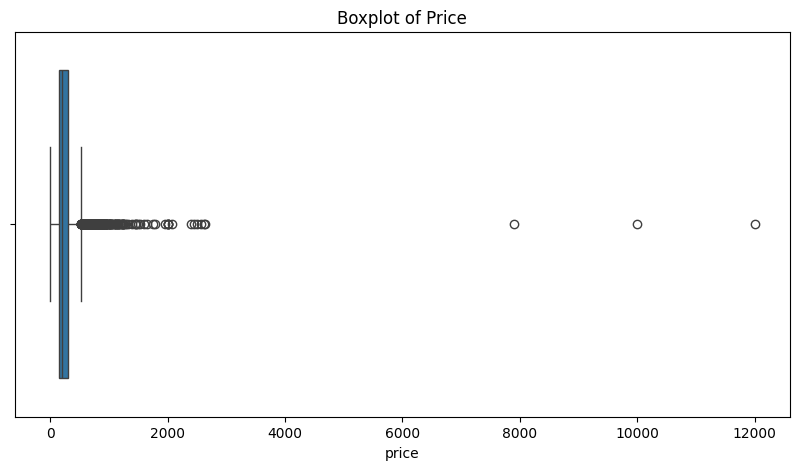

In [29]:
#1. Check for outliers in price
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Price')
plt.show()

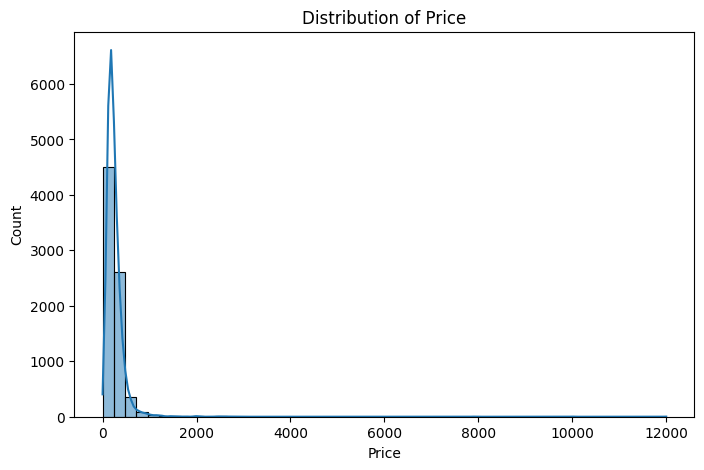

In [30]:
# Histogram of price
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

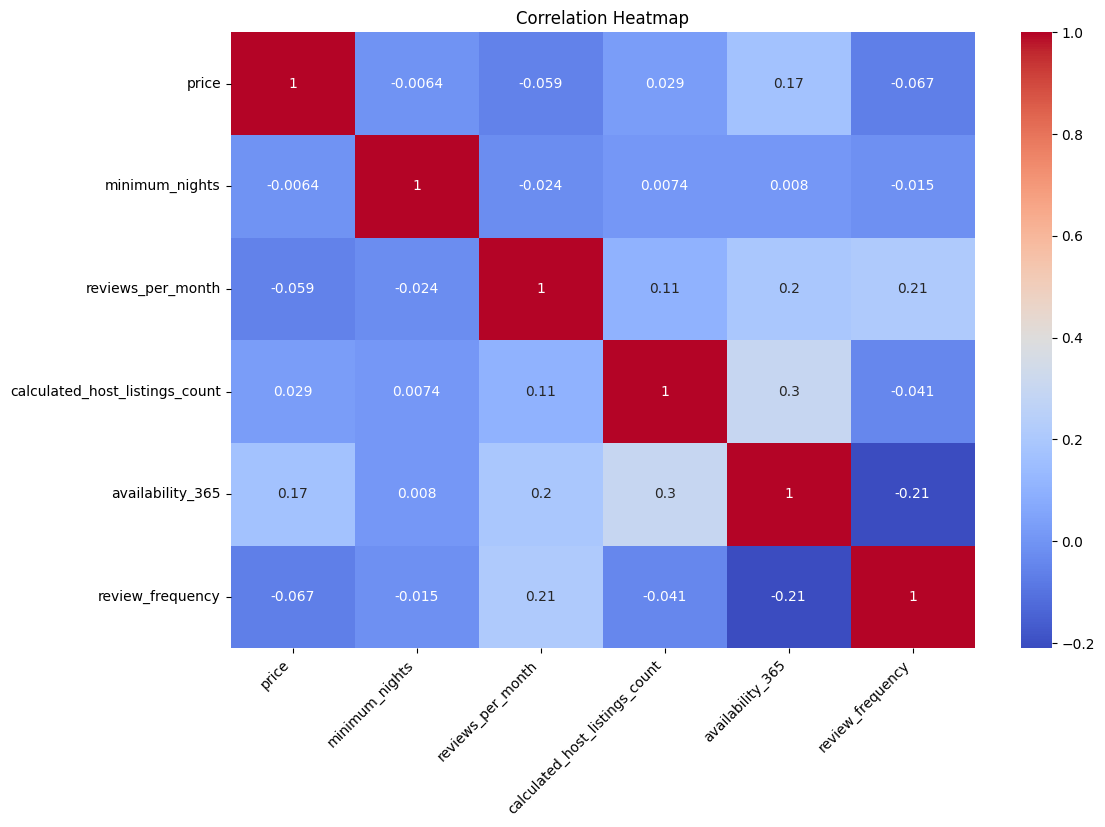

In [31]:
#2. CORRELATION HEATMAP(Numerical Features)
plt.figure(figsize=(12, 8))
numeric_cols = df.select_dtypes(include='number')
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Correlation Heatmap")
plt.show()

In [32]:
#3. PRICE VARIATION BY ROOM TYPE
df['room_type'] = df[['room_type_Hotel room', 'room_type_Private room', 'room_type_Shared room']].idxmax(axis=1)
df['room_type'] = df['room_type'].str.replace('room_type_', '')

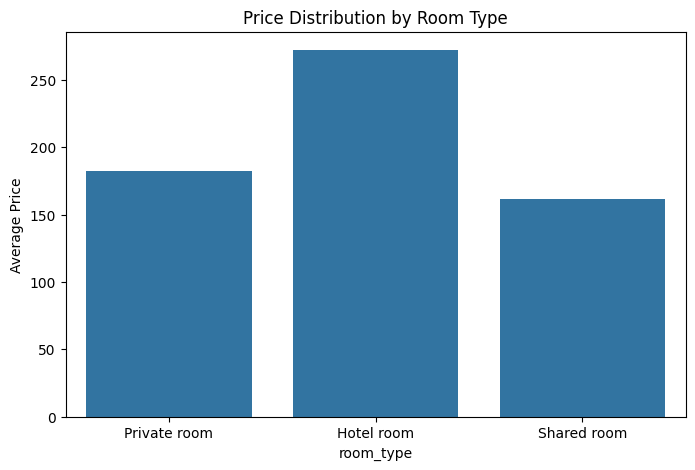

In [33]:
# Boxplot of price vs room_type
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(8, 5))
sns.barplot(x='room_type', y='price', data=df, estimator='mean', ci=None)
plt.title("Price Distribution by Room Type")
plt.ylabel("Average Price")
plt.show()

In [34]:
#4. PRICE BY NEIGHBOURHOOD
neighbourhood_cols = [col for col in df.columns if col.startswith("neighbourhood_")]
df['neighbourhood'] = df[neighbourhood_cols].idxmax(axis=1).str.replace("neighbourhood_", "")

In [35]:
# Group average price by neighbourhood
top_neighbourhood = df.groupby("neighbourhood")['price'].mean().sort_values(ascending=False).head(10)
top_neighbourhood

,price
neighbourhood,
Centrum-Oost,308.900000
Centrum-West,303.006192
Zuid,281.211765
De Pijp - Rivierenbuurt,265.912844
Oud-Noord,252.130058
De Baarsjes - Oud-West,245.950000
De Aker - Nieuw Sloten,241.758065
IJburg - Zeeburgereiland,241.164634
Westerpark,234.792910


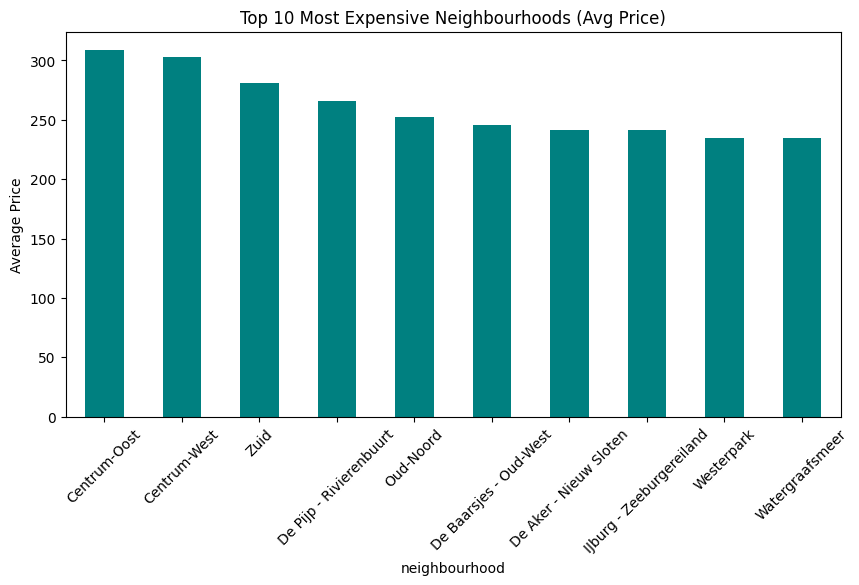

In [36]:
top_neighbourhood.plot(kind='bar', figsize=(10, 5), color='teal')
plt.title("Top 10 Most Expensive Neighbourhoods (Avg Price)")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()

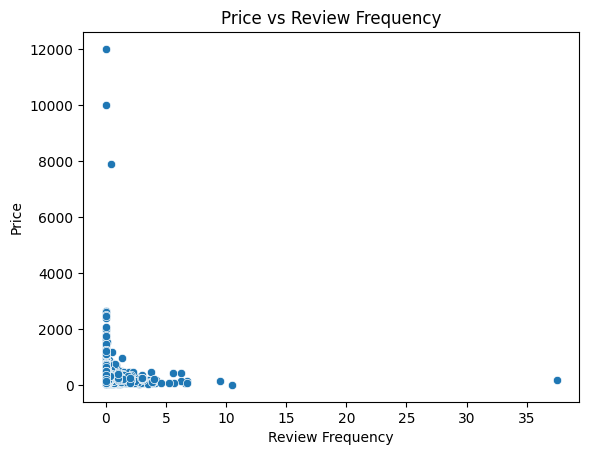

In [37]:
#5. REVIEW IMPACT ON PRICING
sns.scatterplot(x='review_frequency', y='price', data=df)
plt.title('Price vs Review Frequency')
plt.xlabel('Review Frequency')
plt.ylabel('Price')
plt.show()

In [38]:
#6. PRICE BY SEASON
season_cols = ['season_Spring', 'season_Summer', 'season_Winter']

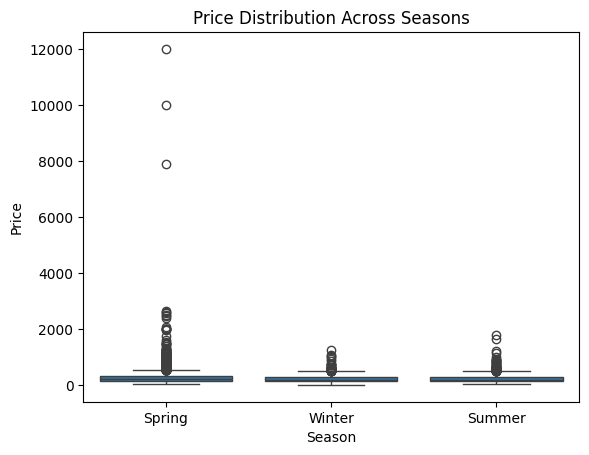

In [39]:
# Create 'season' column for visualization
df['season'] = df[season_cols].idxmax(axis=1).str.replace('season_', '')
sns.boxplot(x='season', y='price', data=df)
plt.title("Price Distribution Across Seasons")
plt.xlabel("Season")
plt.ylabel("Price")
plt.show()

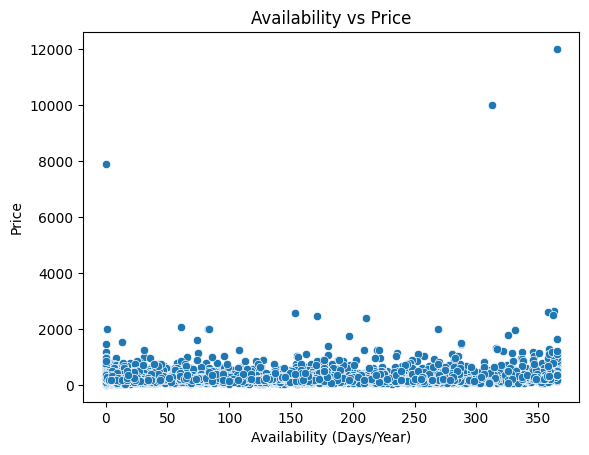

In [40]:
#7. AVAILABILITY vs PRICE
sns.scatterplot(x='availability_365', y='price', data=df)
plt.title('Availability vs Price')
plt.xlabel('Availability (Days/Year)')
plt.ylabel('Price')
plt.show()

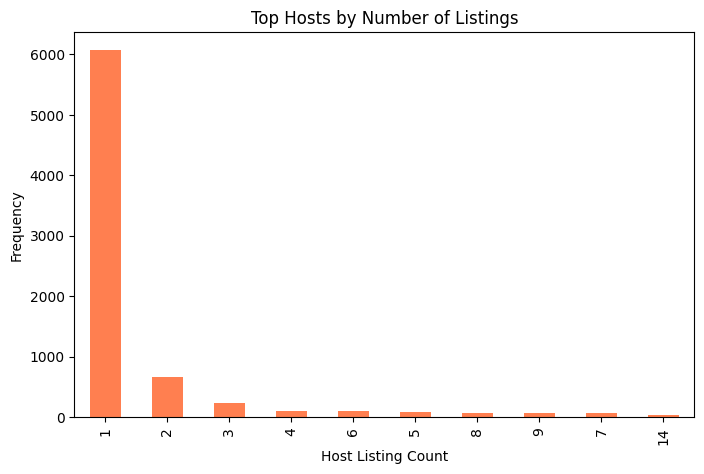

In [41]:
#8. TOP HOSTS BY LISTING COUNT
top_hosts = df['calculated_host_listings_count'].value_counts().head(10)
top_hosts.plot(kind='bar', figsize=(8, 5), color='coral')
plt.title('Top Hosts by Number of Listings')
plt.xlabel('Host Listing Count')
plt.ylabel('Frequency')
plt.show()

**3. MODELING**

In [42]:
df = df.astype(int, errors='ignore')

In [43]:
# Drop all EDA-only string columns
df.drop(columns=['room_type', 'neighbourhood', 'season'], inplace=True, errors='ignore')

In [45]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib

In [46]:
#TRAIN-TEST SPLIT
X = df.drop(columns=['price'])
y = df['price']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
#Display first few rows of data
df.head()

,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,review_frequency,room_type_Hotel room,room_type_Private room,room_type_Shared room,neighbourhood_Bijlmer-Oost,...,neighbourhood_Osdorp,neighbourhood_Oud-Noord,neighbourhood_Oud-Oost,neighbourhood_Slotervaart,neighbourhood_Watergraafsmeer,neighbourhood_Westerpark,neighbourhood_Zuid,season_Spring,season_Summer,season_Winter
0,69,3,1,1,7,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,106,1,2,2,0,2,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,270,4,0,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,200,3,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,137,3,1,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [53]:
#LINEAR REGRESSION
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression → MAE: {mae_lr:.2f}, RMSE: {rmse_lr:.2f}, R²: {r2_lr:.2f}")

Linear Regression → MAE: 99.14, RMSE: 237.87, R²: 0.10


In [54]:
# DECISION TREE REGRESSOR
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Decision Tree → MAE: {mae_dt:.2f}, RMSE: {rmse_dt:.2f}, R²: {r2_dt:.2f}")

Decision Tree → MAE: 146.64, RMSE: 569.87, R²: -4.18


In [55]:
# RANDOM FOREST REGRESSOR
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest → MAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}, R²: {r2_rf:.2f}")

Random Forest → MAE: 107.72, RMSE: 292.68, R²: -0.37


In [56]:
# XGBOOST REGRESSOR
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost → MAE: {mae_xgb:.2f}, RMSE: {rmse_xgb:.2f}, R²: {r2_xgb:.2f}")

XGBoost → MAE: 95.26, RMSE: 265.13, R²: -0.12


In [57]:
print("\nModel Performance Comparison:")
print(f"Linear Regression   → RMSE: {rmse_lr:.2f}, R²: {r2_lr:.2f}")
print(f"Decision Tree       → RMSE: {rmse_dt:.2f}, R²: {r2_dt:.2f}")
print(f"Random Forest       → RMSE: {rmse_rf:.2f}, R²: {r2_rf:.2f}")
print(f"XGBoost             → RMSE: {rmse_xgb:.2f}, R²: {r2_xgb:.2f}")


Model Performance Comparison:
Linear Regression   → RMSE: 237.87, R²: 0.10
Decision Tree       → RMSE: 569.87, R²: -4.18
Random Forest       → RMSE: 292.68, R²: -0.37
XGBoost             → RMSE: 265.13, R²: -0.12


In [58]:
#SAVE THE BEST MODEL
joblib.dump(lr, 'best_airbnb_model.pkl')
print("Model saved as 'best_airbnb_model.pkl'")

Model saved as 'best_airbnb_model.pkl'


In [59]:
import joblib
import numpy as np
import pandas as pd

# Load trained model
model = joblib.load('/content/best_airbnb_model.pkl')

In [60]:
# All required dummy columns used during training
all_columns = [
    'minimum_nights', 'reviews_per_month', 'calculated_host_listings_count',
    'availability_365', 'review_frequency','room_type_Hotel room', 'room_type_Private room',
    'room_type_Shared room', 'neighbourhood_Bijlmer-Oost', 'neighbourhood_Bos en Lommer',
       'neighbourhood_Buitenveldert - Zuidas', 'neighbourhood_Centrum-Oost',
       'neighbourhood_Centrum-West', 'neighbourhood_De Aker - Nieuw Sloten',
       'neighbourhood_De Baarsjes - Oud-West', 'neighbourhood_De Pijp - Rivierenbuurt',
       'neighbourhood_Gaasperdam - Driemond', 'neighbourhood_Geuzenveld - Slotermeer',
       'neighbourhood_IJburg - Zeeburgereiland', 'neighbourhood_Noord-Oost', 'neighbourhood_Noord-West',
       'neighbourhood_Oostelijk Havengebied - Indische Buurt', 'neighbourhood_Osdorp', 'neighbourhood_Oud-Noord',
       'neighbourhood_Oud-Oost', 'neighbourhood_Slotervaart', 'neighbourhood_Watergraafsmeer', 'neighbourhood_Westerpark',
       'neighbourhood_Zuid', 'season_Spring', 'season_Summer', 'season_Winter'
]

In [61]:
def recommend_price(room_type, season, availability, reviews_per_month, neighbourhood):
    # Base inputs
    data = {col: 0 for col in all_columns}
    data['availability_365'] = availability
    data['reviews_per_month'] = reviews_per_month
    data['minimum_nights'] = 1
    data['calculated_host_listings_count'] = 1
    data['review_frequency'] = reviews_per_month

    # Encode categorical values (room_type, season, neighbourhood)
    if f'room_type_{room_type}' in data:
        data[f'room_type_{room_type}'] = 1
    if f'season_{season}' in data:
        data[f'season_{season}'] = 1
    if f'neighbourhood_{neighbourhood}' in data:
        data[f'neighbourhood_{neighbourhood}'] = 1

    # Convert to DataFrame and predict
    input_df = pd.DataFrame([data])
    predicted_price = model.predict(input_df)[0]

    return round(predicted_price, 2)

In [62]:
#Example
predicted_price = recommend_price(
    room_type='Private room',
    season='Summer',
    availability=220,
    reviews_per_month=1.7,
    neighbourhood='Centrum-West'
)

print(f"Recommended Price: €{predicted_price}")

Recommended Price: €275.19


In [63]:
inputs = [
    ('Hotel room', 'Winter', 150, 0.8, 'Centrum-Oost'),
    ('Shared room', 'Spring', 300, 2.2, 'De Pijp - Rivierenbuurt'),
    ('Private room', 'Summer', 200, 1.5, 'Centrum-West'),
    ('Private room', 'Winter', 90, 0.3, 'Zuid'),
    ('Hotel room', 'Summer', 100, 1.9, 'Bos en Lommer'),
    ('Shared room', 'Spring', 220, 2.8, 'Oud-Oost'),
    ('Private room', 'Winter', 190, 0.5, 'Westerpark'),
    ('Hotel room', 'Spring', 180, 0.9, 'De Baarsjes - Oud-West'),
    ('Private room', 'Summer', 250, 1.2, 'Oostelijk Havengebied - Indische Buurt'),
    ('Shared room', 'Winter', 160, 0.4, 'Slotervaart')
]

for i, (rt, season, avail, revs, nbhd) in enumerate(inputs, 1):
    price = recommend_price(rt, season, avail, revs, nbhd)
    print(f"{i}. {rt}, {season}, {nbhd} → Recommended Price: €{price}")

1. Hotel room, Winter, Centrum-Oost → Recommended Price: €286.9
2. Shared room, Spring, De Pijp - Rivierenbuurt → Recommended Price: €273.52
3. Private room, Summer, Centrum-West → Recommended Price: €264.25
4. Private room, Winter, Zuid → Recommended Price: €164.05
5. Hotel room, Summer, Bos en Lommer → Recommended Price: €147.24
6. Shared room, Spring, Oud-Oost → Recommended Price: €202.35
7. Private room, Winter, Westerpark → Recommended Price: €169.74
8. Hotel room, Spring, De Baarsjes - Oud-West → Recommended Price: €265.0
9. Private room, Summer, Oostelijk Havengebied - Indische Buurt → Recommended Price: €195.01
10. Shared room, Winter, Slotervaart → Recommended Price: €99.24


In [64]:
# Valid options
valid_room_types = ['Hotel room', 'Private room', 'Shared room']
valid_seasons = ['Spring', 'Summer', 'Winter']
valid_neighbourhoods = [col.replace('neighbourhood_', '') for col in all_columns if col.startswith('neighbourhood_')]

def get_valid_input(prompt, valid_list):
    while True:
        val = input(prompt)
        if val in valid_list:
            return val
        print(f"Invalid input. Please choose from: {valid_list}")

def get_float_input(prompt):
    while True:
        try:
            val = float(input(prompt))
            if val < 0:
                print("Please enter a non-negative number.")
            else:
                return val
        except ValueError:
            print("Invalid input. Please enter a valid number.")

# Start user input interaction
print("\nUser input for custom price recommendation:\n")

room_type = get_valid_input("Enter Room Type (Hotel room / Private room / Shared room): ", valid_room_types)
season = get_valid_input("Enter Season (Spring / Summer / Winter): ", valid_seasons)
neighbourhood = get_valid_input("Enter Neighbourhood: ", valid_neighbourhoods)
availability = get_float_input("Enter Availability (0–365): ")
reviews_per_month = get_float_input("Enter Reviews per Month: ")

# Predict and display
try:
    predicted_price = recommend_price(room_type, season, availability, reviews_per_month, neighbourhood)
    print(f"\nRecommended Price: €{predicted_price}")
except Exception as e:
    print(f"\nCould not generate price due to: {str(e)}")


User input for custom price recommendation:

Enter Room Type (Hotel room / Private room / Shared room): Shared room
Enter Season (Spring / Summer / Winter): 1oa
Invalid input. Please choose from: ['Spring', 'Summer', 'Winter']
Enter Season (Spring / Summer / Winter): Summer
Enter Neighbourhood: antros89
Invalid input. Please choose from: ['Bijlmer-Oost', 'Bos en Lommer', 'Buitenveldert - Zuidas', 'Centrum-Oost', 'Centrum-West', 'De Aker - Nieuw Sloten', 'De Baarsjes - Oud-West', 'De Pijp - Rivierenbuurt', 'Gaasperdam - Driemond', 'Geuzenveld - Slotermeer', 'IJburg - Zeeburgereiland', 'Noord-Oost', 'Noord-West', 'Oostelijk Havengebied - Indische Buurt', 'Osdorp', 'Oud-Noord', 'Oud-Oost', 'Slotervaart', 'Watergraafsmeer', 'Westerpark', 'Zuid']
Enter Neighbourhood: Centrum-West
Enter Availability (0–365): re
Invalid input. Please enter a valid number.
Enter Availability (0–365): 54
Enter Reviews per Month: month
Invalid input. Please enter a valid number.
Enter Reviews per Month: 21

Rec